In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

## Загрузка и первичный анализ

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Обработка пропусков

In [8]:
# Удаляем столбцы, которые не несут значимой информации
data.drop(['Cabin','Name','Ticket','PassengerId'], axis = 1, inplace = True)
y = data.Survived
data.drop('Survived', axis=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [10]:
# Заполняем отсутствующие значения возраста средним возрастом
data['Age'] = data['Age'].replace(0,np.nan)
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [11]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

## Преобразование категориальных признаков в числовые

In [12]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
# Кодируем признаки Pclass и Embarked в отдельные столбцы
data = pd.get_dummies(data, columns=['Pclass','Embarked'])

In [14]:
# Пол кодируем в 1/0
data['IsMale']=data.Sex.replace({'female':0,'male':1})
data.drop('Sex', axis = 1, inplace = True)

In [15]:
data.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,IsMale
0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,35.0,1,0,53.1000,1,0,0,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,0,1,1


## Масштабирование значений

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc2 = StandardScaler()
sc2.fit(data)
sc2_data = sc2.transform(data)

In [18]:
data = pd.DataFrame(sc2_data, columns = data.columns)

In [19]:
data.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,IsMale
0,-0.592481,0.432793,-0.473674,-0.502445,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,0.737695
1,0.638789,0.432793,-0.473674,0.786845,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710,-1.355574
2,-0.284663,-0.474545,-0.473674,-0.488854,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,-1.355574
3,0.407926,0.432793,-0.473674,0.420730,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306,-1.355574
4,0.407926,-0.474545,-0.473674,-0.486337,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306,0.737695


## Разделение выборки

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(712, 11) (712,)
(179, 11) (179,)


## Обучение модели

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=10)

In [24]:
KNeighborsClassifierObj.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [25]:
y_predicted = KNeighborsClassifierObj.predict(X_test)

## Метрики качества

In [26]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, classification_report

In [27]:
accuracy_score(y_test, y_predicted)

0.8100558659217877

In [28]:
balanced_accuracy_score(y_test, y_predicted)

0.7855869620575503

In [29]:
precision_score(y_test, y_predicted)

0.9215686274509803

In [30]:
classification_report(y_test, y_predicted, output_dict = True)

{'0': {'precision': 0.765625,
  'recall': 0.9607843137254902,
  'f1-score': 0.8521739130434782,
  'support': 102},
 '1': {'precision': 0.9215686274509803,
  'recall': 0.6103896103896104,
  'f1-score': 0.734375,
  'support': 77},
 'accuracy': 0.8100558659217877,
 'macro avg': {'precision': 0.8435968137254901,
  'recall': 0.7855869620575503,
  'f1-score': 0.7932744565217391,
  'support': 179},
 'weighted avg': {'precision': 0.8327068956074049,
  'recall': 0.8100558659217877,
  'f1-score': 0.8015006376001943,
  'support': 179}}

## Кросс-валидация

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
scores = cross_val_score(KNeighborsClassifierObj, 
                         X_train, y_train, cv=3,
                        scoring='f1_weighted')
scores, np.mean(scores)

(array([0.74089857, 0.79170005, 0.80583123]), 0.7794766175045528)

## Подбор гиперпараметров

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]

In [35]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='f1_weighted')

In [36]:
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [37]:
clf_gs.best_params_

{'n_neighbors': 20}

In [38]:
clf_gs.best_score_

0.786847821819429

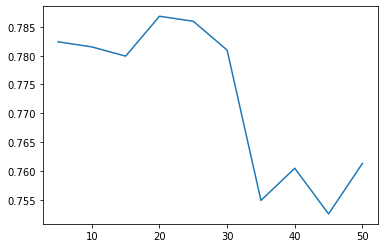

In [39]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])